  <header>
    <h1>K-Nearest Neighbor’s sensitivity to noise comparing with otheralgorithms</h1>
    <h3>Implementation of statistical stignificance test</h3>
    <p><strong>Authors: </strong>Voulgari Eleni, Mylonaki Aggeliki, Konstantopoulou Vasiliki and Karydis Athanasios</p>
  </header>
  <br>
  <br>
  <p> Importing ELA metrics (loss of accuracy), in noise-oriented dictionaries

In [1]:
import glob, os
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot as plt
from scipy.stats import normaltest
import numpy as np
from scipy import stats


oldPath=os.getcwd()
homePath=oldPath+"/ELAResults"
os.chdir(homePath)

df = DataFrame()

files=glob.glob("10/*")
dict10={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict10[f]=df

files=glob.glob("20/*")
dict20={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict20[f]=df


files=glob.glob("33/*")
dict33={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict33[f]=df


files=glob.glob("0/*")
dict0={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict0[f]=df
    
os.chdir(oldPath)

<strong>
<br>
<br>Implementing Normality test</strong>
<br> Normality tests are needed so as to understand if a parametric or non-parametric statistical test should be chosen

In [2]:
normal=0
not_normal=0

for dictionary in dict0,dict20,dict20,dict33:
    for key, entry in dictionary.items():
        #descriptive statistics
        #print r[0]
        #print r[1].describe(),"\n"
        value, p = normaltest(entry)

        if p >= 0.05:
            normal+=1
        else:
            not_normal+=1

print "Total files=", len(dict0) + len(dict10) + len(dict20)+ len(dict33),"\n\n"
print "Samples likely originating from normal distribution:", normal
print "Samples NOT likely originating from normal distribution:", not_normal

/home/eleni/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Total files= 204 


Samples likely originating from normal distribution: 182
Samples NOT likely originating from normal distribution: 22


<strong><br>
<br>
Plotting our data</strong>
<br>
*Note: Remove comment to see descriptive statistics.

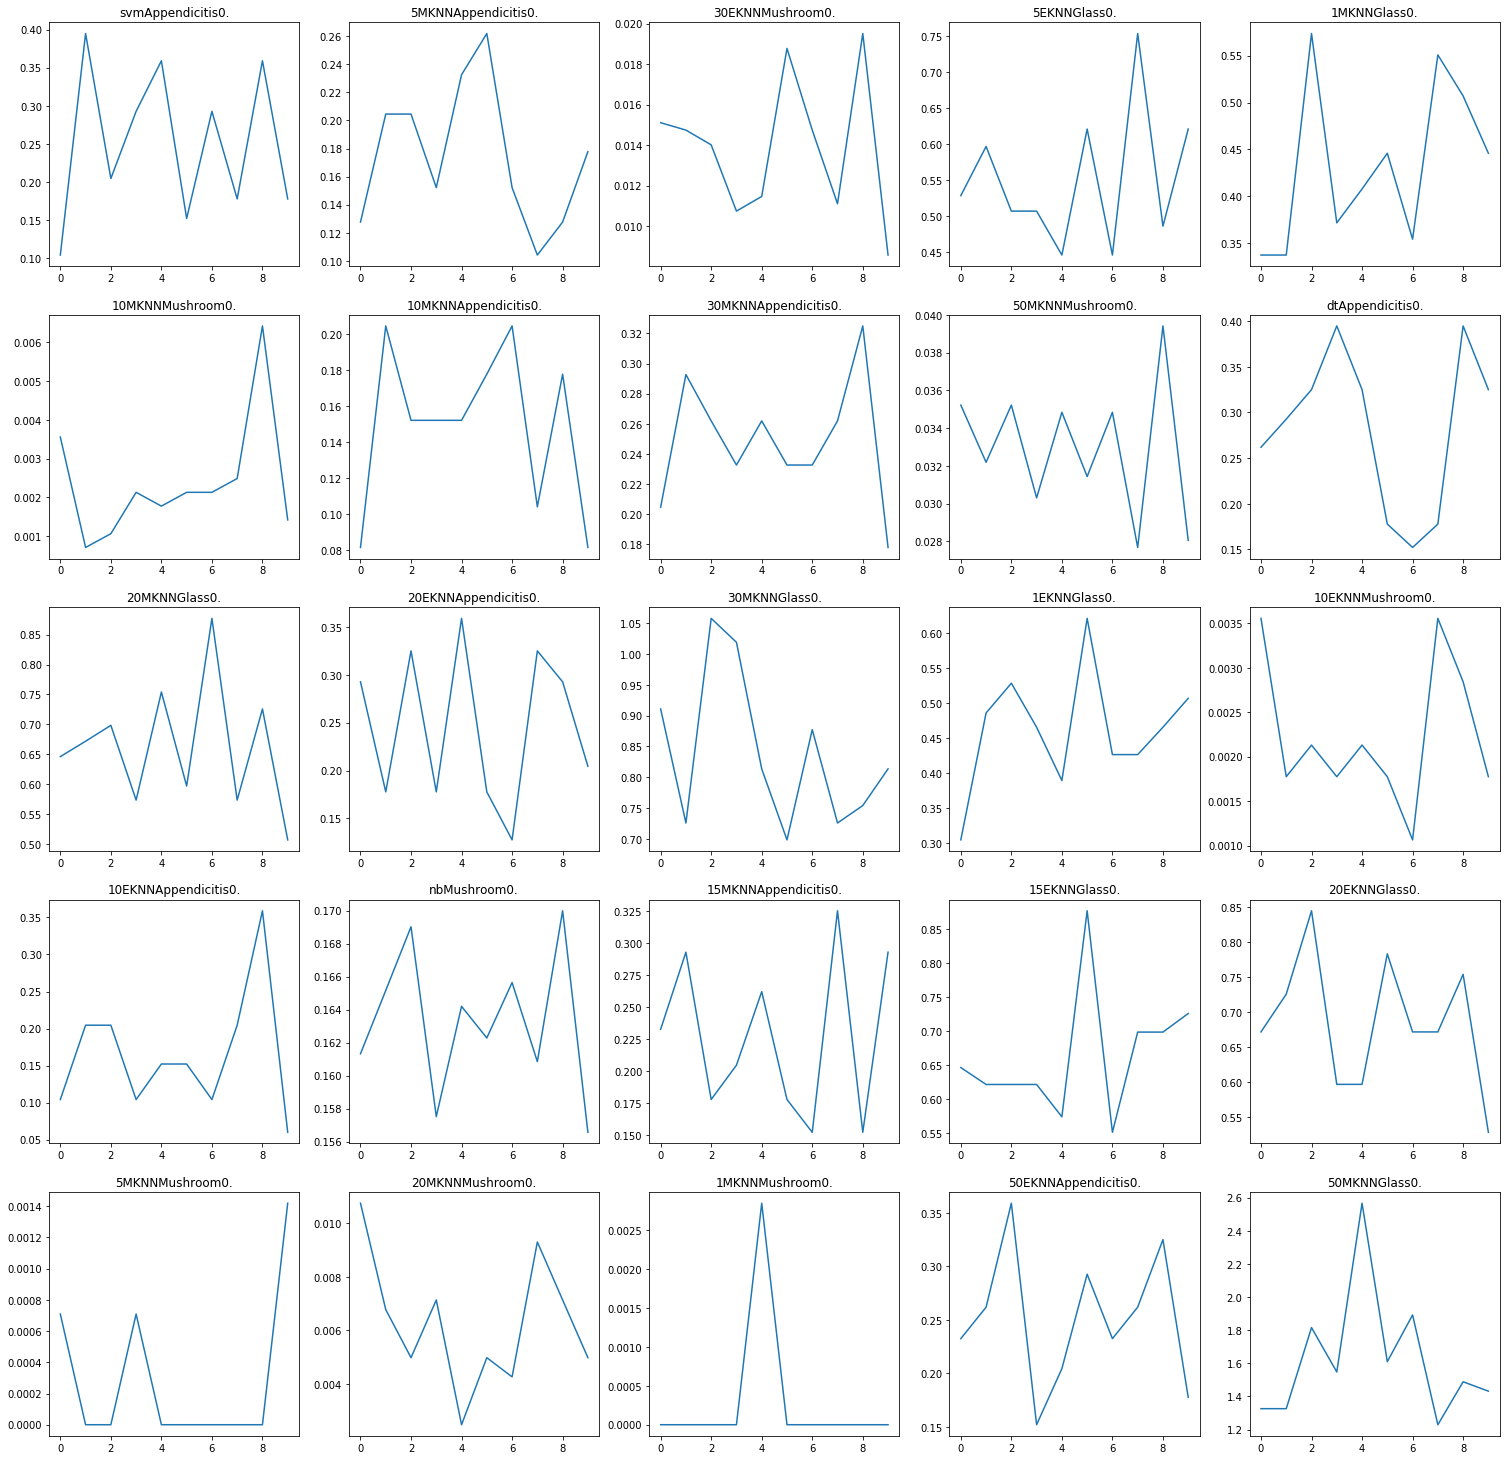

In [3]:

fig, ax = plt.subplots(5, 5,figsize=(26, 26))
column=0
row=0

for dictionary in dict0,dict20,dict20,dict33:
    for key, entry in dictionary.items():

        if row == 5:
            break;
          
        elements=entry.values.flatten().tolist()
        #print entry.describe()
        ax[row, column].plot(elements)
        ax[row, column].set_title(key[2:-3])
        
        if column==4:
            row+=1
            column=0
        else:
            column+=1
        
plt.show()        

<strong><br>
<br>Comparison of the accuracy loss:</strong>
<br> For each noise level, we compare knn, using various configurations for K (number of neighbors), with Decision Trees, Naive Bayes and Support Vector Machines
<br>*Note: Comparing each algorithm against KNN

In [4]:
from scipy import stats

noise_level=["0","10","20","33"]
noise_level_index=0

acceptances=0
rejects=0

for dictionary in dict0,dict10,dict20,dict33: #for noise_level 0% ,10% ,20% ,33%
    for dataset in ["Mushroom", "Glass","Appendicitis"]:
        for knn_neighbor_num in ["1","5","10","15","20","30","50"]:
            for distance_type in ["E", "M"]: # for Eucledean, Minkowski distance types
                knnResults= noise_level[noise_level_index]+"/"+knn_neighbor_num + distance_type+ "KNN"\
                    +dataset+noise_level[noise_level_index]+".csv"
                
                for model in ["dt","nb","svm"]:
                    otherModelResults= noise_level[noise_level_index]+"/"+\
                        model+dataset+noise_level[noise_level_index]+".csv"
                    
                    #print "\n\nComparing: ", knnResults," - ",otherModelResults
                    #paired-T test
                    stat, p = stats.ttest_rel(dictionary[knnResults].values.flatten().tolist(),
                                    dictionary[otherModelResults].values.flatten().tolist())
                    
                    #Kolmogorov-Smirnov
                    #stats.ks_2samp(dictionary[knnResults].values.flatten().tolist(),\
                    #               dictionary[otherModelResults].values.flatten().tolist())
                                     
                    
                    #Wilcoxon
                    #stats.wilcoxon(dictionary[knnResults].values.flatten().tolist(),
                    #                dictionary[otherModelResults].values.flatten().tolist())
                    
                    if p > 0.05:
                        acceptances+=1
                    else:
                        rejects+=1
    noise_level_index+=1

print "Rejects: ", rejects
print "Acceptances: ", acceptances


Rejects:  283
Acceptances:  221


<strong><br>
<br>Comparison of the accuracy loss:</strong>
<br> For each noise level, we compare knn, using various configurations for K (number of neighbors), with Decision Trees, Naive Bayes and Support Vector Machines
<br>*Note: Comparing all algorithms against KNN

In [5]:
noise_level=["0","10","20","33"]
noise_level_index=0

acceptances=0
rejects=0

for dictionary in dict0,dict10,dict20,dict33: #for noise_level 0% ,10% ,20% ,33%
    for dataset in ["Mushroom", "Glass","Appendicitis"]:
        for knn_neighbor_num in ["1","5","10","15","20","30","50"]:
            for distance_type in ["E", "M"]: # for Eucledean, Minkowski distance types
                knn= noise_level[noise_level_index]+"/"+knn_neighbor_num + distance_type+ "KNN"\
                    +dataset+noise_level[noise_level_index]+".csv"
                
                svm=noise_level[noise_level_index]+"/"+\
                        "svm"+dataset+noise_level[noise_level_index]+".csv"
                nb=noise_level[noise_level_index]+"/"+\
                        "nb"+dataset+noise_level[noise_level_index]+".csv"
                dt=noise_level[noise_level_index]+"/"+\
                        "dt"+dataset+noise_level[noise_level_index]+".csv"
                
                #print ("Comparing: "+knn+" "+dt+" "+nb+" "+svm)
                #print dictionary[knn].values.flatten().tolist()
                #print dictionary[svm].values.flatten().tolist()
                #print dictionary[dt].values.flatten().tolist()
                #print dictionary[nb].values.flatten().tolist()
                
                #Friedman's test
                stat, p = stats.friedmanchisquare(dictionary[knn].values.flatten().tolist(),
                    dictionary[svm].values.flatten().tolist(),
                    dictionary[dt].values.flatten().tolist(),
                    dictionary[nb].values.flatten().tolist())
                    
                    
                if p > 0.05:
                    acceptances+=1
                else:
                    rejects+=1
                    
    noise_level_index+=1

print "Rejects: ", rejects
print "Acceptances: ", acceptances


Rejects:  136
Acceptances:  32


<strong><br>
<br>Comparing the effect of K in accuracy loss</strong>
<br> For each noise level, we compare all versions of KNN (different K) to check how they are affected by noise
<br>*Note: All versions of KNN for each noise level are compared silmutaneously

In [6]:
noise_level=["10","20","33"]
noise_level_index=0

acceptances=0
rejects=0

for dictionary in dict10,dict20,dict33: #for noise_level 10% ,20% ,33%
    for dataset in ["Mushroom", "Glass","Appendicitis"]:
            for distance_type in ["E", "M"]: # for Eucledean, Minkowski distance types
                knn=[]
                files_compared=""
                for knn_neighbor_num in ["1","5","10","15","20","30","50"]:
                    filename=noise_level[noise_level_index]+"/"+knn_neighbor_num + distance_type+ "KNN"\
                    +dataset+noise_level[noise_level_index]+".csv"
                    
                    knn.append(dictionary[filename].values.flatten().tolist())
                    files_compared+=" "+filename
                
                #print "\n\nComparing:",files_compared
                #Friedman's test
                stat, p = stats.friedmanchisquare(*knn)
                    
                    
                if p > 0.05:
                    acceptances+=1
                else:
                    rejects+=1
                    
    noise_level_index+=1

print "Rejects: ", rejects
print "Acceptances: ", acceptances

Rejects:  13
Acceptances:  5


<strong><br>
<br>Comparing the effect of K in accuracy loss</strong>
<br> For each noise level, we compare all versions of KNN (different K) to check how they are affected by noise
<br>*Note: 2 versions of the algorithm for a specific noise level are compared in each test

In [7]:
noise_level=["10","20","33"]
noise_level_index=0

neighbor_num=["1","5","10","15","20","30","50"]
acceptances=0
rejects=0

for dictionary in dict10,dict20,dict33: #for noise_level 10% ,20% ,33%
    for dataset in ["Mushroom", "Glass","Appendicitis"]:
            for distance_type in ["E", "M"]: # for Eucledean, Minkowski distance types
                for i in range(len(neighbor_num)):
                    
                    knn1=noise_level[noise_level_index]+"/"+neighbor_num[i] + distance_type+ "KNN"\
                    +dataset+noise_level[noise_level_index]+".csv"
                    
                    for j in range(i+1,len(neighbor_num)):
                        knn2=noise_level[noise_level_index]+"/"+neighbor_num[j] + distance_type+ "KNN"\
                        +dataset+noise_level[noise_level_index]+".csv"
             
                        #print "\n\nComparing: "+knn1+" "+knn2
                        #paired-T test
                        stat, p = stats.ttest_rel(dictionary[knn1].values.flatten().tolist(),
                                        dictionary[knn2].values.flatten().tolist())


                        if p > 0.05:
                            acceptances+=1
                        else:
                            rejects+=1
                    
    noise_level_index+=1

print "Rejects: ", rejects
print "Acceptances: ", acceptances

Rejects:  204
Acceptances:  174
